In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib as mpl
import numpy as np

In [36]:
X,y = make_blobs(n_samples = 300,centers = 3,n_features = 2,cluster_std = 1.0,random_state = 42)
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
ltcolors = plt.cm.Paired((0,2,6,8,4,10))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)
ltcolors_map = mpl.colors.ListedColormap(ltcolors)

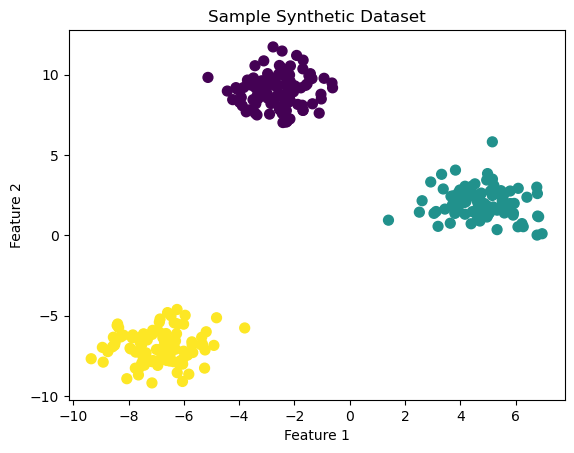

In [37]:
plt.scatter(X[:,0],X[:,1],c=y,s = 50,cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Synthetic Dataset')
plt.show()

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(X_train,y_train)

[[-6.48517505 -7.30109407]
 [ 5.53947871  2.2804692 ]
 [ 5.14486612  2.83892488]
 [-8.50716963 -6.83202465]
 [ 5.79798971  2.76483238]
 [ 5.1549141   2.48695563]
 [-7.5793527  -6.66612968]
 [-2.97261532  8.54855637]
 [-5.71184513 -6.62568875]
 [-7.53026976 -7.36723498]
 [-7.32392045 -6.5028091 ]
 [-2.14780202 10.55232269]
 [ 2.61473625  2.159624  ]
 [ 6.82968177  1.1648714 ]
 [ 4.7368748   2.56832671]
 [-6.24684533 -4.60941674]
 [-3.18611962  9.62596242]
 [ 4.6213657   1.68451105]
 [-2.28173769 10.32142888]
 [ 4.68545068  1.32156934]
 [ 5.15492652  5.82590117]
 [-5.8212027  -8.63884908]
 [-3.58009012  9.49675854]
 [-6.01002127 -5.52447173]
 [-2.42215055  8.71527878]
 [-8.58300963 -6.93565729]
 [-6.61990469 -7.78442622]
 [-2.97867201  9.55684617]
 [-7.64288635 -8.68499169]
 [ 3.86705362  1.73635108]
 [-3.42862186 10.56422053]
 [ 3.81765844  2.2168569 ]
 [-6.30255506 -7.08315498]
 [ 4.43175659  1.48016875]
 [ 3.71294836  1.91364433]
 [ 5.5938806   2.62456094]
 [-2.75458574  8.26054996]
 

In [51]:
model = Sequential([
    Dense(units=3,activation='relu'),
    Dense(units=5,activation='linear')
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8684
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7460 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7750 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4004 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2519 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1459 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1068 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0704 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0498 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0372 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0311 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 
Epoch 16/100
8/8 ━━━

In [56]:
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min()- 0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()- 0.5, X[:, 1].max()+0.5
    h = max(x_max-x_min, y_max-y_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
   #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')

In [53]:
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        # this didn't work on coursera but did in local version
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    c=col, vmin=0, vmax=map.N, cmap=map,
                    s=size, label=label)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    color=map(col), vmin=0, vmax=map.N, 
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

In [54]:
def plt_cat_mc(X_train, y_train, model, classes):
    #make a model for plotting routines to call
    model_predict = lambda Xl: np.argmax(model.predict(Xl),axis=1)

    fig,ax = plt.subplots(1,1, figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
 
    #add the original data to the decison boundary
    plt_mc_data(ax, X_train,y_train, classes, map=dkcolors_map, legend=True)
    #plot the decison boundary. 
    plot_cat_decision_boundary_mc(ax, X_train, model_predict, vector=True)
    ax.set_title("model decision boundary")

    plt.xlabel(r'$x_0$');
    plt.ylabel(r"$x_1$"); 
    plt.show()

  1/244 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step

C:\Users\xamra\AppData\Local\Temp\ipykernel_15540\229357177.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


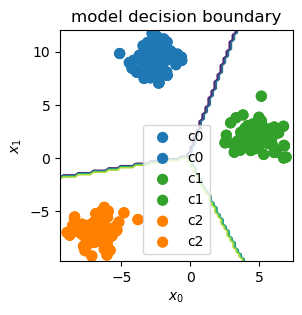

In [55]:
plt_cat_mc(X_train,y_train,model,3)

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=1.0, random_state=42)
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [69]:
# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = max(x_max - x_min, y_max - y_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
points = np.c_[xx.ravel(), yy.ravel()]
# Predict the label for each point in the mesh grid
Z = knn.predict(points)
Z = Z.reshape(xx.shape)

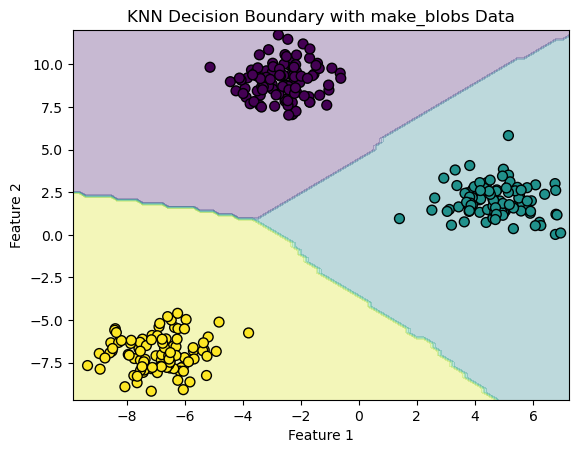

In [74]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1],c=y, cmap='viridis',  s=50,edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary with make_blobs Data')
plt.show()